# **Classification Problem**
---
## UCI Cleveland Heart disease dataset



### Algorithms used:
* Adaptive Boost (AdaBoost)
* Gradient Boost (GradBoost)
* Extreme Boost (XGBoost)
---
### HyperParameter Tuning tools used
* GridSearch CV
* RandomizedSearch CV
* Optuna
* HyperOpt


In [ ]:
!pip install optuna
!pip install hyperopt

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split

import optuna
from hyperopt import hp,fmin,tpe,Trials,space_eval

import warnings as w
w.filterwarnings('ignore')



> **Data Loading**



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0




> **Check info of dataset**



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB




> **Check for any null values**



In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64



> **Check the correlation between variables in dataset**



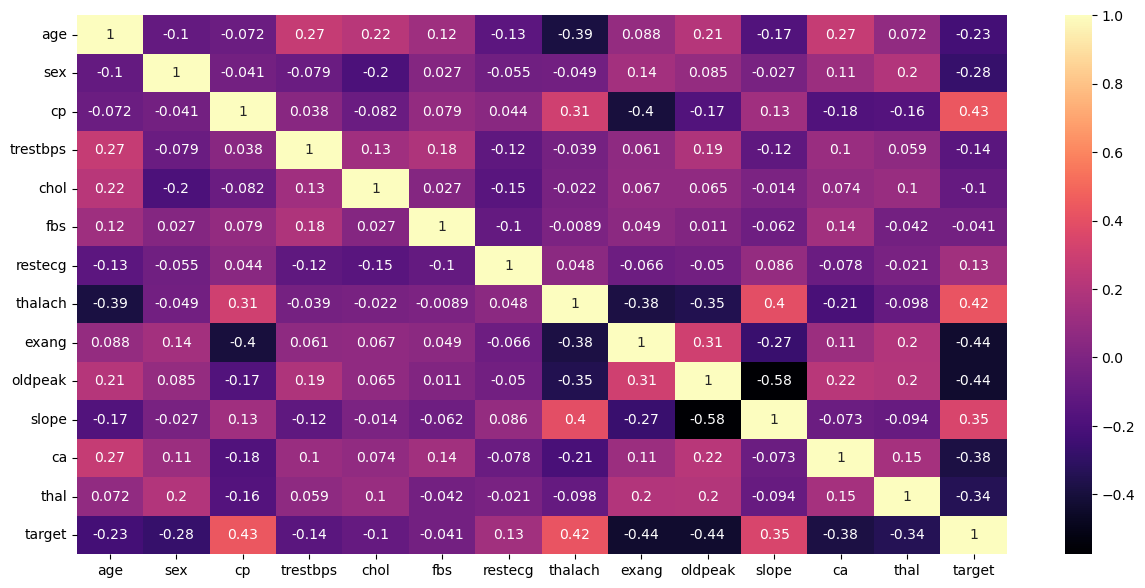

In [6]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap='magma',annot=True)
plt.show()

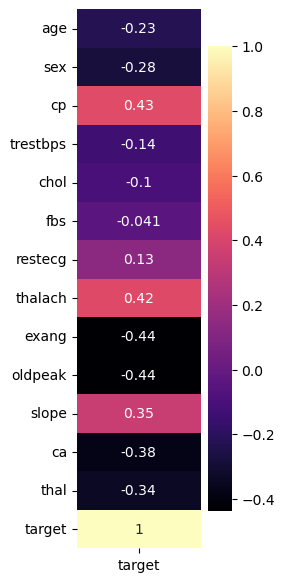

In [7]:
plt.figure(figsize=(2,7))
sns.heatmap(df.corr()[['target']],cmap='magma',annot=True)
plt.show()



> **Separate features and target variables**



In [8]:
X=df.drop('target',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [9]:
y=df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64



> **Perform Train-Test-Split on X & y**



In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=3,train_size=0.75)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(768, 13)
(257, 13)
(768,)
(257,)


### **GridSearchCV**




> **Initialize the classifiers for GridSearchCV**





In [12]:
base_randf=RandomForestClassifier()
base_adab=AdaBoostClassifier()
base_gradb=GradientBoostingClassifier()
base_xgb=XGBClassifier()

#### **1. RandomForest**

In [ ]:
param={'n_estimators'  :[400,650,950],
      'criterion'      :['gini', 'entropy', 'log_loss'],
      'max_features'   :['sqrt', 'log2', None]
      }

gsv_randf=GridSearchCV(estimator=base_randf,
                      param_grid=param,
                      n_jobs=-1,
                      scoring='accuracy',
                      cv=5,
                      verbose=2)

gsv_randf.fit(x_train,y_train)

In [13]:
print(gsv_randf.best_score_)
print(gsv_randf.best_params_)

NameError: name 'gsv_randf' is not defined

In [ ]:
randf=RandomForestClassifier(**gsv_randf.best_params_)
randf.fit(x_train,y_train)
y_pred=randf.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

#### **2. AdaBoost**

In [ ]:
param={
    'n_estimators'  :[300,350,400],
    'learning_rate' :list(np.linspace(0.1,1,100)),
    'algorithm'     :['SAMME', 'SAMME.R']
}

gsv_adab=GridSearchCV(estimator=base_adab,
                 param_grid=param,
                 n_jobs=-1,
                 scoring='accuracy',
                 cv=5,
                 verbose=2)

gsv_adab.fit(x_train,y_train)

In [ ]:
print(gsv_adab.best_score_)
print(gsv_adab.best_params_)

0.9609540786011375
{'algorithm': 'SAMME.R', 'learning_rate': 0.9545454545454545, 'n_estimators': 400}


In [ ]:
adab=AdaBoostClassifier(**gsv_adab.best_params_)
adab.fit(x_train,y_train)
y_pred=adab.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

#### **3. GradientBoost**

In [ ]:
param={
    'n_estimators'  :[300,350,400,450],
    'learning_rate' :list(np.linspace(0.1,1,100)),
    'max_depth'     :list(range(4,13)),
    'max_features'  :['auto','log2']
}

gsv_gb=GridSearchCV(estimator=base_gradb,
                 param_grid=param,
                 n_jobs=-1,
                 scoring='accuracy',
                 cv=5,
                 verbose=2)

gsv_gb.fit(x_train,y_train)

In [ ]:
print(gsv_gb.best_score_)
print(gsv_gb.best_params_)

0.9843731431966726
{'learning_rate': 0.23636363636363636, 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 400}


In [ ]:
gradb=GradientBoostingClassifier(**gsv_gb.best_params_)
gradb.fit(x_train,y_train)
y_pred=gradb.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

#### **4. XGBoost**

In [ ]:
param = {
    'n_estimators'      : [400,500,750,900,1000],
    'max_depth'         : [8,9,10],
    'learning_rate'     : list(np.linspace(0.01,1,100))
}

gsv_xgb=GridSearchCV(estimator=base_xgb,
                     param_grid=param,
                     n_jobs=-1,
                     cv=5,
                     scoring='accuracy',
                     verbose=2)

gsv_xgb.fit(x_train,y_train)

In [ ]:
print(gsv_xgb.best_score_)
print(gsv_xgb.best_params_)

0.9765809354044649
{'learning_rate': 0.7100000000000001, 'max_depth': 10, 'n_estimators': 400, 'tree_method': 'gpu_hist'}


In [ ]:
xgb=XGBClassifier(**gsv_xgb.best_params_)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

### **RandomizedSearchCV**


> **Initialize the base classifiers for RandomizedSearchCV**

In [ ]:
base_randf=RandomForestClassifier()
base_adab=AdaBoostClassifier()
base_gradb=GradientBoostingClassifier()
base_xgb=XGBClassifier()

#### **1. RandomForest**

In [ ]:
param={'n_estimators'  :[400,650,950],
      'criterion'      :['gini', 'entropy', 'log_loss'],
      'max_features'   :['sqrt', 'log2', None]
      }

randSCV_randf=RandomizedSearchCV(
                        estimator=base_randf,
                        param_distributions=param,
                        n_iter=100,
                        n_jobs=-1,
                        scoring='accuracy',
                        cv=5,
                        verbose=2,
                        random_state=3)

randSCV_randf.fit(x_train,y_train)

In [ ]:
print(randSCV_randf.best_score_)
print(randSCV_randf.best_params_)

In [ ]:
randf=RandomForestClassifier(**randSCV_randf.best_params_)
randf.fit(x_train,y_train)
y_pred=randf.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

#### **2. AdaBoost**

In [ ]:
param={
    'n_estimators'  :[300,350,400,500,1000],
    'learning_rate' :list(np.linspace(0.1,1,100)),
    'algorithm'     :['SAMME', 'SAMME.R']
}

randSCV_adab=RandomizedSearchCV(
    estimator=base_adab,
    param_distributions =param,
    n_iter=100,
    n_jobs=-1,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=3)

randSCV_adab.fit(x_train,y_train)

In [ ]:
print(randSCV_adab.best_score_)
print(randSCV_adab.best_params_)

0.9648841354723707
{'n_estimators': 1000, 'learning_rate': 0.7363636363636363, 'algorithm': 'SAMME.R'}


In [ ]:
adab=AdaBoostClassifier(**randSCV_adab.best_params_)
adab.fit(x_train,y_train)
y_pred=adab.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

#### **3. GradientBoost**

In [ ]:
param={
    'n_estimators'  :[300,350,400,450,600,700,800,900,1000,2000,3000],
    'learning_rate' :list(np.linspace(0.1,1,100)),
    'max_depth'     :list(range(4,13)),
    'max_features'  :['auto','log2']
}

randSCV_gb=RandomizedSearchCV(
    estimator=base_gradb,
    param_distributions =param,
    n_iter=100,
    n_jobs=-1,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=3)

randSCV_gb.fit(x_train,y_train)

In [ ]:
print(randSCV_gb.best_score_)
print(randSCV_gb.best_params_)

0.9791868262456498
{'n_estimators': 300, 'max_features': 'auto', 'max_depth': 10, 'learning_rate': 0.5454545454545454}


In [ ]:
gradb=GradientBoostingClassifier(**randSCV_gb.best_params_)
gradb.fit(x_train,y_train)
y_pred=gradb.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

#### **4. XGBoost**

In [ ]:
param = {
    'n_estimators'      : [100,200,300,350,400,450,500,750,900,1000],
    'max_depth'         : list(range(4,13)),
    'learning_rate'     : list(np.linspace(0.1,1,100)),
    'min_child_weight'  : [1,200]
}

randSCV_xgb=RandomizedSearchCV(estimator=base_xgb,
    param_distributions =param,
    n_iter=100,
    n_jobs=-1,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=3)

randSCV_xgb.fit(x_train,y_train)

In [ ]:
print(randSCV_xgb.best_score_)
print(randSCV_xgb.best_params_)

0.9726848315083609
{'tree_method': 'gpu_hist', 'n_estimators': 450, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.3727272727272727}


In [ ]:
xgb=XGBClassifier(**randSCV_xgb.best_params_)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

### **Optuna**


#### **1. RandomForest**

In [ ]:
def objective(trial):
  param={
      'n_estimators'  :trial.suggest_int('n_estimators',100,2000),
      'criterion'     :trial.suggest_categorical('criterion',['gini', 'entropy', 'log_loss']),
      'max_features'  :trial.suggest_categorical('max_features',['sqrt', 'log2', None])
  }

  opt_randf=RandomForestClassifier(**param)
  opt_randf.fit(x_train,y_train)
  y_pred=opt_randf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
#  accuracies.append(accuracy)
#  print('max_accuracy',max(accuracies))
  return(accuracy)

In [ ]:
#accuracies=[]
find_params=optuna.create_study()
find_params.optimize(objective,n_trials=50,n_jobs=-1,)

In [ ]:
param_df=find_params.trials_dataframe()[['value','params_criterion','params_max_features','params_n_estimators']]
param_df=param_df[param_df['value']==max(param_df['value'])]
best_param={'n_estimators': param_df['params_n_estimators'].values[0], 
            'criterion'   : param_df['params_criterion'].values[0], 
            'max_features': param_df['params_max_features'].values[0]}
best_param

In [ ]:
randf=RandomForestClassifier(**best_param)
randf.fit(x_train,y_train)
y_pred=randf.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

#### **2. AdaBoost**

In [ ]:
def objective(trial):
  param={
      'n_estimators'  :trial.suggest_int('n_estimators',100,2000),
      'learning_rate' :trial.suggest_uniform('learning_rate',0.1,1),
      'algorithm'     :trial.suggest_categorical('algorithm',['SAMME', 'SAMME.R'])
  }
  opt_adab=AdaBoostClassifier(**param)
  opt_adab.fit(x_train,y_train)
  y_pred=opt_adab.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
#  accuracies.append(accuracy)
#  print('max_accuracy',max(accuracies))
  return(accuracy)

In [ ]:
#accuracies=[]
find_params=optuna.create_study()
find_params.optimize(objective,n_trials=50,n_jobs=-1,)

[I 2023-05-29 15:05:49,140] A new study created in memory with name: no-name-fbb6422e-ba9a-4c22-913b-b4065ee0dade
[I 2023-05-29 15:05:50,657] Trial 0 finished with value: 0.8793774319066148 and parameters: {'n_estimators': 371, 'learning_rate': 0.30328330189646835, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.8793774319066148.


max_accuracy 0.8793774319066148


[I 2023-05-29 15:05:52,712] Trial 1 finished with value: 0.8949416342412452 and parameters: {'n_estimators': 814, 'learning_rate': 0.4567380914213772, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.8793774319066148.


max_accuracy 0.8949416342412452


[I 2023-05-29 15:05:57,790] Trial 2 finished with value: 0.9066147859922179 and parameters: {'n_estimators': 1371, 'learning_rate': 0.1382310218593664, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.8793774319066148.


max_accuracy 0.9066147859922179


[I 2023-05-29 15:05:58,645] Trial 3 finished with value: 0.933852140077821 and parameters: {'n_estimators': 1424, 'learning_rate': 0.9156665167382483, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.8793774319066148.


max_accuracy 0.933852140077821


[I 2023-05-29 15:05:59,352] Trial 4 finished with value: 0.9066147859922179 and parameters: {'n_estimators': 357, 'learning_rate': 0.6351891722988648, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.8793774319066148.


max_accuracy 0.933852140077821


[I 2023-05-29 15:05:59,851] Trial 6 finished with value: 0.8988326848249028 and parameters: {'n_estimators': 101, 'learning_rate': 0.6922045486824072, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.8793774319066148.


max_accuracy 0.933852140077821


[I 2023-05-29 15:06:01,068] Trial 5 finished with value: 0.8793774319066148 and parameters: {'n_estimators': 587, 'learning_rate': 0.25306576430427974, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.8793774319066148.


max_accuracy 0.933852140077821


[I 2023-05-29 15:06:02,036] Trial 8 finished with value: 0.8832684824902723 and parameters: {'n_estimators': 233, 'learning_rate': 0.5092698739426904, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.8793774319066148.


max_accuracy 0.933852140077821


[I 2023-05-29 15:06:03,706] Trial 7 finished with value: 0.9766536964980544 and parameters: {'n_estimators': 811, 'learning_rate': 0.8634982446328968, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.8793774319066148.


max_accuracy 0.9766536964980544


[I 2023-05-29 15:06:07,104] Trial 10 finished with value: 0.9766536964980544 and parameters: {'n_estimators': 662, 'learning_rate': 0.9669330988837052, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.8793774319066148.


max_accuracy 0.9766536964980544


[I 2023-05-29 15:06:09,189] Trial 9 finished with value: 0.9883268482490273 and parameters: {'n_estimators': 1380, 'learning_rate': 0.8055560837998734, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.8793774319066148.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:11,586] Trial 12 finished with value: 0.8715953307392996 and parameters: {'n_estimators': 588, 'learning_rate': 0.24303579004010506, 'algorithm': 'SAMME'}. Best is trial 12 with value: 0.8715953307392996.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:14,909] Trial 11 finished with value: 0.8910505836575876 and parameters: {'n_estimators': 1835, 'learning_rate': 0.3951503261190425, 'algorithm': 'SAMME'}. Best is trial 12 with value: 0.8715953307392996.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:16,798] Trial 14 finished with value: 0.8793774319066148 and parameters: {'n_estimators': 470, 'learning_rate': 0.30612558399503653, 'algorithm': 'SAMME'}. Best is trial 12 with value: 0.8715953307392996.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:19,165] Trial 13 finished with value: 0.8949416342412452 and parameters: {'n_estimators': 1892, 'learning_rate': 0.3395011676151637, 'algorithm': 'SAMME'}. Best is trial 12 with value: 0.8715953307392996.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:20,665] Trial 15 finished with value: 0.8754863813229572 and parameters: {'n_estimators': 901, 'learning_rate': 0.12391034893217723, 'algorithm': 'SAMME'}. Best is trial 12 with value: 0.8715953307392996.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:24,057] Trial 16 finished with value: 0.8715953307392996 and parameters: {'n_estimators': 1051, 'learning_rate': 0.12927525287059316, 'algorithm': 'SAMME'}. Best is trial 12 with value: 0.8715953307392996.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:25,387] Trial 17 finished with value: 0.8754863813229572 and parameters: {'n_estimators': 1051, 'learning_rate': 0.10594199383310332, 'algorithm': 'SAMME'}. Best is trial 12 with value: 0.8715953307392996.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:28,593] Trial 18 finished with value: 0.8832684824902723 and parameters: {'n_estimators': 1110, 'learning_rate': 0.23135847050007752, 'algorithm': 'SAMME'}. Best is trial 12 with value: 0.8715953307392996.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:30,361] Trial 19 finished with value: 0.8871595330739299 and parameters: {'n_estimators': 1076, 'learning_rate': 0.22313486529687132, 'algorithm': 'SAMME'}. Best is trial 12 with value: 0.8715953307392996.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:34,188] Trial 20 finished with value: 0.8910505836575876 and parameters: {'n_estimators': 1153, 'learning_rate': 0.2214809813384671, 'algorithm': 'SAMME'}. Best is trial 12 with value: 0.8715953307392996.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:35,989] Trial 21 finished with value: 0.8949416342412452 and parameters: {'n_estimators': 1230, 'learning_rate': 0.4104815091742636, 'algorithm': 'SAMME'}. Best is trial 12 with value: 0.8715953307392996.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:37,981] Trial 22 finished with value: 0.8754863813229572 and parameters: {'n_estimators': 834, 'learning_rate': 0.13019327678055445, 'algorithm': 'SAMME'}. Best is trial 12 with value: 0.8715953307392996.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:39,745] Trial 23 finished with value: 0.8754863813229572 and parameters: {'n_estimators': 880, 'learning_rate': 0.11898352322229333, 'algorithm': 'SAMME'}. Best is trial 12 with value: 0.8715953307392996.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:41,861] Trial 24 finished with value: 0.867704280155642 and parameters: {'n_estimators': 929, 'learning_rate': 0.1761210908327125, 'algorithm': 'SAMME'}. Best is trial 24 with value: 0.867704280155642.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:46,346] Trial 25 finished with value: 0.8910505836575876 and parameters: {'n_estimators': 1650, 'learning_rate': 0.17278373905775835, 'algorithm': 'SAMME'}. Best is trial 24 with value: 0.867704280155642.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:48,588] Trial 26 finished with value: 0.8910505836575876 and parameters: {'n_estimators': 1601, 'learning_rate': 0.18981001336832337, 'algorithm': 'SAMME'}. Best is trial 24 with value: 0.867704280155642.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:49,859] Trial 27 finished with value: 0.9027237354085603 and parameters: {'n_estimators': 640, 'learning_rate': 0.21285061061162264, 'algorithm': 'SAMME.R'}. Best is trial 24 with value: 0.867704280155642.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:52,097] Trial 28 finished with value: 0.9299610894941635 and parameters: {'n_estimators': 655, 'learning_rate': 0.2918082235631062, 'algorithm': 'SAMME.R'}. Best is trial 24 with value: 0.867704280155642.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:53,830] Trial 29 finished with value: 0.8910505836575876 and parameters: {'n_estimators': 960, 'learning_rate': 0.2883293145442869, 'algorithm': 'SAMME'}. Best is trial 24 with value: 0.867704280155642.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:55,976] Trial 30 finished with value: 0.8910505836575876 and parameters: {'n_estimators': 963, 'learning_rate': 0.34419696899672547, 'algorithm': 'SAMME'}. Best is trial 24 with value: 0.867704280155642.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:57,821] Trial 32 finished with value: 0.8599221789883269 and parameters: {'n_estimators': 458, 'learning_rate': 0.1678732169800141, 'algorithm': 'SAMME'}. Best is trial 32 with value: 0.8599221789883269.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:58,725] Trial 31 finished with value: 0.8949416342412452 and parameters: {'n_estimators': 1208, 'learning_rate': 0.34631772659865856, 'algorithm': 'SAMME'}. Best is trial 32 with value: 0.8599221789883269.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:06:59,434] Trial 33 finished with value: 0.8715953307392996 and parameters: {'n_estimators': 368, 'learning_rate': 0.18098823814514653, 'algorithm': 'SAMME'}. Best is trial 32 with value: 0.8599221789883269.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:07:00,178] Trial 34 finished with value: 0.8482490272373541 and parameters: {'n_estimators': 347, 'learning_rate': 0.18289165911239139, 'algorithm': 'SAMME'}. Best is trial 34 with value: 0.8482490272373541.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:07:01,518] Trial 35 finished with value: 0.8715953307392996 and parameters: {'n_estimators': 479, 'learning_rate': 0.15380835163117657, 'algorithm': 'SAMME'}. Best is trial 34 with value: 0.8482490272373541.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:07:02,485] Trial 36 finished with value: 0.8715953307392996 and parameters: {'n_estimators': 494, 'learning_rate': 0.17474775562821207, 'algorithm': 'SAMME'}. Best is trial 34 with value: 0.8482490272373541.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:07:02,753] Trial 37 finished with value: 0.8599221789883269 and parameters: {'n_estimators': 241, 'learning_rate': 0.26791916542775657, 'algorithm': 'SAMME'}. Best is trial 34 with value: 0.8482490272373541.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:07:03,841] Trial 39 finished with value: 0.8560311284046692 and parameters: {'n_estimators': 214, 'learning_rate': 0.2551204254179938, 'algorithm': 'SAMME'}. Best is trial 34 with value: 0.8482490272373541.
[I 2023-05-29 15:07:03,890] Trial 38 finished with value: 0.8521400778210116 and parameters: {'n_estimators': 278, 'learning_rate': 0.26999506054734457, 'algorithm': 'SAMME'}. Best is trial 34 with value: 0.8482490272373541.


max_accuracy 0.9883268482490273
max_accuracy 0.9883268482490273


[I 2023-05-29 15:07:04,569] Trial 40 finished with value: 0.867704280155642 and parameters: {'n_estimators': 121, 'learning_rate': 0.27502367294081137, 'algorithm': 'SAMME.R'}. Best is trial 34 with value: 0.8482490272373541.
[I 2023-05-29 15:07:04,732] Trial 41 finished with value: 0.8988326848249028 and parameters: {'n_estimators': 134, 'learning_rate': 0.49943049333951517, 'algorithm': 'SAMME.R'}. Best is trial 34 with value: 0.8482490272373541.


max_accuracy 0.9883268482490273
max_accuracy 0.9883268482490273


[I 2023-05-29 15:07:05,580] Trial 42 finished with value: 0.8482490272373541 and parameters: {'n_estimators': 241, 'learning_rate': 0.2643354051075453, 'algorithm': 'SAMME'}. Best is trial 34 with value: 0.8482490272373541.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:07:05,891] Trial 43 finished with value: 0.8521400778210116 and parameters: {'n_estimators': 275, 'learning_rate': 0.25876518633668955, 'algorithm': 'SAMME'}. Best is trial 34 with value: 0.8482490272373541.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:07:06,640] Trial 44 finished with value: 0.8560311284046692 and parameters: {'n_estimators': 252, 'learning_rate': 0.25518796218389556, 'algorithm': 'SAMME'}. Best is trial 34 with value: 0.8482490272373541.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:07:07,020] Trial 45 finished with value: 0.8754863813229572 and parameters: {'n_estimators': 272, 'learning_rate': 0.4034277861811934, 'algorithm': 'SAMME'}. Best is trial 34 with value: 0.8482490272373541.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:07:07,879] Trial 46 finished with value: 0.8754863813229572 and parameters: {'n_estimators': 302, 'learning_rate': 0.3174428269918612, 'algorithm': 'SAMME'}. Best is trial 34 with value: 0.8482490272373541.


max_accuracy 0.9883268482490273


[I 2023-05-29 15:07:08,436] Trial 47 finished with value: 0.8754863813229572 and parameters: {'n_estimators': 341, 'learning_rate': 0.32060066888865796, 'algorithm': 'SAMME'}. Best is trial 34 with value: 0.8482490272373541.
[I 2023-05-29 15:07:08,624] Trial 48 finished with value: 0.8638132295719845 and parameters: {'n_estimators': 175, 'learning_rate': 0.35876007304220675, 'algorithm': 'SAMME'}. Best is trial 34 with value: 0.8482490272373541.


max_accuracy 0.9883268482490273
max_accuracy 0.9883268482490273


[I 2023-05-29 15:07:08,808] Trial 49 finished with value: 0.8599221789883269 and parameters: {'n_estimators': 147, 'learning_rate': 0.35909806057556337, 'algorithm': 'SAMME'}. Best is trial 34 with value: 0.8482490272373541.


max_accuracy 0.9883268482490273


In [ ]:
param_df=find_params.trials_dataframe()[['value','params_learning_rate','params_algorithm','params_n_estimators']]
param_df=param_df[param_df['value']==max(param_df['value'])]
best_param={'n_estimators'    : param_df['params_n_estimators'].values[0], 
            'learning_rate'   : param_df['params_learning_rate'].values[0], 
            'algorithm'       : param_df['params_algorithm'].values[0]}
best_param

In [ ]:
adab=AdaBoostClassifier(**best_param)
adab.fit(x_train,y_train)
y_pred=adab.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

0.9883268482490273


#### **3. GradientBoost**

In [ ]:
def objective(trial):
  param={
    'n_estimators'              :trial.suggest_int('n_estimators',100,3000),
    'learning_rate'             :trial.suggest_float('learning_rate',0.0001,1.0),
    'max_depth'                 :trial.suggest_int('max_depth',1,15),
    'max_features'              :trial.suggest_categorical('max_features',['auto','log2']),
    'min_samples_split'         :trial.suggest_int('min_samples_split',2,100),
    'min_weight_fraction_leaf'  :trial.suggest_float('min_weight_fraction_leaf',0.0,0.5)
}

  opt_gradb=GradientBoostingClassifier(**param)
  opt_gradb.fit(x_train,y_train)
  y_pred=opt_gradb.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
#  accuracies.append(accuracy)
#  print('max_accuracy',max(accuracies))
  return(accuracy)

In [ ]:
#accuracies=[]
find_params=optuna.create_study()
find_params.optimize(objective,n_trials=50,n_jobs=-1,)

[I 2023-05-29 15:37:14,174] A new study created in memory with name: no-name-c535e009-39df-401e-8239-d6cad054d162
[I 2023-05-29 15:37:14,682] Trial 1 finished with value: 0.9285714285714286 and parameters: {'n_estimators': 242, 'learning_rate': 0.6423180192316905, 'max_depth': 9, 'max_features': 'log2', 'min_samples_split': 84, 'min_weight_fraction_leaf': 0.23355262608608207}. Best is trial 1 with value: 0.9285714285714286.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:37:18,121] Trial 2 finished with value: 0.8733766233766234 and parameters: {'n_estimators': 1763, 'learning_rate': 0.5457250308846952, 'max_depth': 13, 'max_features': 'log2', 'min_samples_split': 77, 'min_weight_fraction_leaf': 0.31185146709706113}. Best is trial 2 with value: 0.8733766233766234.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:37:18,718] Trial 0 finished with value: 0.8506493506493507 and parameters: {'n_estimators': 2415, 'learning_rate': 0.24713669548022132, 'max_depth': 12, 'max_features': 'log2', 'min_samples_split': 91, 'min_weight_fraction_leaf': 0.40598651418126336}. Best is trial 0 with value: 0.8506493506493507.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:37:20,622] Trial 4 finished with value: 0.9545454545454546 and parameters: {'n_estimators': 1086, 'learning_rate': 0.36504978004603583, 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 80, 'min_weight_fraction_leaf': 0.19821812838009795}. Best is trial 0 with value: 0.8506493506493507.


max_accuracy 0.9545454545454546


[I 2023-05-29 15:37:20,906] Trial 3 finished with value: 0.8344155844155844 and parameters: {'n_estimators': 1466, 'learning_rate': 0.6360942756918624, 'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 95, 'min_weight_fraction_leaf': 0.3754849026809698}. Best is trial 3 with value: 0.8344155844155844.


max_accuracy 0.9545454545454546


[I 2023-05-29 15:37:21,671] Trial 5 finished with value: 0.762987012987013 and parameters: {'n_estimators': 661, 'learning_rate': 0.15869835226914114, 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 62, 'min_weight_fraction_leaf': 0.4666122085853794}. Best is trial 5 with value: 0.762987012987013.


max_accuracy 0.9545454545454546


[I 2023-05-29 15:37:23,738] Trial 7 finished with value: 0.8441558441558441 and parameters: {'n_estimators': 1196, 'learning_rate': 0.07154822110976407, 'max_depth': 13, 'max_features': 'auto', 'min_samples_split': 71, 'min_weight_fraction_leaf': 0.3904799046258389}. Best is trial 5 with value: 0.762987012987013.


max_accuracy 0.9545454545454546


[I 2023-05-29 15:37:24,571] Trial 6 finished with value: 0.9545454545454546 and parameters: {'n_estimators': 2061, 'learning_rate': 0.16863618317619286, 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 21, 'min_weight_fraction_leaf': 0.2105507274168525}. Best is trial 5 with value: 0.762987012987013.


max_accuracy 0.9545454545454546


[I 2023-05-29 15:37:26,679] Trial 8 finished with value: 0.8214285714285714 and parameters: {'n_estimators': 1724, 'learning_rate': 0.8378610023447942, 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.36307373279102895}. Best is trial 5 with value: 0.762987012987013.


max_accuracy 0.9545454545454546


[I 2023-05-29 15:37:27,928] Trial 10 finished with value: 0.9772727272727273 and parameters: {'n_estimators': 341, 'learning_rate': 0.27078700548720075, 'max_depth': 11, 'max_features': 'log2', 'min_samples_split': 40, 'min_weight_fraction_leaf': 0.02537122100394551}. Best is trial 5 with value: 0.762987012987013.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:29,121] Trial 9 finished with value: 0.9707792207792207 and parameters: {'n_estimators': 2588, 'learning_rate': 0.4325052838244933, 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.2549690579365563}. Best is trial 5 with value: 0.762987012987013.
[I 2023-05-29 15:37:29,223] Trial 11 finished with value: 0.7532467532467533 and parameters: {'n_estimators': 766, 'learning_rate': 0.05294644855325341, 'max_depth': 2, 'max_features': 'log2', 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.4832350681642368}. Best is trial 11 with value: 0.7532467532467533.


max_accuracy 0.9772727272727273
max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:30,584] Trial 13 finished with value: 0.6785714285714286 and parameters: {'n_estimators': 735, 'learning_rate': 0.026273567893551564, 'max_depth': 1, 'max_features': 'log2', 'min_samples_split': 32, 'min_weight_fraction_leaf': 0.48976005940747824}. Best is trial 13 with value: 0.6785714285714286.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:30,830] Trial 12 finished with value: 0.6785714285714286 and parameters: {'n_estimators': 731, 'learning_rate': 0.9500034246519395, 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 54, 'min_weight_fraction_leaf': 0.4902902933755065}. Best is trial 13 with value: 0.6785714285714286.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:31,927] Trial 14 finished with value: 0.4675324675324675 and parameters: {'n_estimators': 760, 'learning_rate': 0.008384978317267287, 'max_depth': 1, 'max_features': 'log2', 'min_samples_split': 28, 'min_weight_fraction_leaf': 0.49957389148511205}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:32,630] Trial 15 finished with value: 0.6785714285714286 and parameters: {'n_estimators': 771, 'learning_rate': 0.8879489510542586, 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 32, 'min_weight_fraction_leaf': 0.4889380574945938}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:34,089] Trial 16 finished with value: 0.7694805194805194 and parameters: {'n_estimators': 1101, 'learning_rate': 0.9731885134811722, 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 52, 'min_weight_fraction_leaf': 0.4490766789745963}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273
max_accuracy 

[I 2023-05-29 15:37:34,293] Trial 18 finished with value: 0.7532467532467533 and parameters: {'n_estimators': 108, 'learning_rate': 0.7648000832488744, 'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.43167368192897493}. Best is trial 14 with value: 0.4675324675324675.


0.9772727272727273


[I 2023-05-29 15:37:35,101] Trial 19 finished with value: 0.8701298701298701 and parameters: {'n_estimators': 498, 'learning_rate': 0.9974248765438972, 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 58, 'min_weight_fraction_leaf': 0.4189718968953239}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:37,255] Trial 20 finished with value: 0.8538961038961039 and parameters: {'n_estimators': 1354, 'learning_rate': 0.4881022422723993, 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 39, 'min_weight_fraction_leaf': 0.34232802957298825}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:37,634] Trial 17 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 2959, 'learning_rate': 0.7295345046761377, 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 56, 'min_weight_fraction_leaf': 0.43425397900694496}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:38,848] Trial 22 finished with value: 0.6785714285714286 and parameters: {'n_estimators': 793, 'learning_rate': 0.03150288886922812, 'max_depth': 1, 'max_features': 'log2', 'min_samples_split': 26, 'min_weight_fraction_leaf': 0.490728938542134}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:40,235] Trial 23 finished with value: 0.4675324675324675 and parameters: {'n_estimators': 982, 'learning_rate': 0.002492616832468264, 'max_depth': 2, 'max_features': 'log2', 'min_samples_split': 40, 'min_weight_fraction_leaf': 0.49748902508749426}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:41,851] Trial 24 finished with value: 0.762987012987013 and parameters: {'n_estimators': 996, 'learning_rate': 0.13784338257018824, 'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 44, 'min_weight_fraction_leaf': 0.4487807617426771}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:42,501] Trial 21 finished with value: 0.7694805194805194 and parameters: {'n_estimators': 2854, 'learning_rate': 0.3830632921314102, 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 21, 'min_weight_fraction_leaf': 0.43979739817583896}. Best is trial 14 with value: 0.4675324675324675.
[I 2023-05-29 15:37:42,691] Trial 25 finished with value: 0.762987012987013 and parameters: {'n_estimators': 465, 'learning_rate': 0.30858794542491064, 'max_depth': 2, 'max_features': 'log2', 'min_samples_split': 65, 'min_weight_fraction_leaf': 0.4503147431355576}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273
max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:43,246] Trial 26 finished with value: 0.4675324675324675 and parameters: {'n_estimators': 468, 'learning_rate': 0.27243017937794556, 'max_depth': 2, 'max_features': 'log2', 'min_samples_split': 67, 'min_weight_fraction_leaf': 0.498994930939581}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:44,418] Trial 27 finished with value: 0.6201298701298701 and parameters: {'n_estimators': 985, 'learning_rate': 0.0058738329171497804, 'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 49, 'min_weight_fraction_leaf': 0.49121947535048693}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:45,054] Trial 28 finished with value: 0.8344155844155844 and parameters: {'n_estimators': 941, 'learning_rate': 0.11027347658054974, 'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 69, 'min_weight_fraction_leaf': 0.40519150258310777}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:45,430] Trial 29 finished with value: 0.8344155844155844 and parameters: {'n_estimators': 519, 'learning_rate': 0.202358154377861, 'max_depth': 2, 'max_features': 'log2', 'min_samples_split': 37, 'min_weight_fraction_leaf': 0.3996431733653491}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:46,040] Trial 30 finished with value: 0.8246753246753247 and parameters: {'n_estimators': 510, 'learning_rate': 0.26625892004681284, 'max_depth': 2, 'max_features': 'log2', 'min_samples_split': 12, 'min_weight_fraction_leaf': 0.4075085678109776}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:47,547] Trial 31 finished with value: 0.4675324675324675 and parameters: {'n_estimators': 1261, 'learning_rate': 0.21887347056459217, 'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 30, 'min_weight_fraction_leaf': 0.4993725956393866}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:48,414] Trial 32 finished with value: 0.6201298701298701 and parameters: {'n_estimators': 1331, 'learning_rate': 0.004283534811024699, 'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 45, 'min_weight_fraction_leaf': 0.4935709980439215}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:49,733] Trial 33 finished with value: 0.7597402597402597 and parameters: {'n_estimators': 1298, 'learning_rate': 0.21089305820778653, 'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 32, 'min_weight_fraction_leaf': 0.463707148808243}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:51,620] Trial 34 finished with value: 0.7532467532467533 and parameters: {'n_estimators': 1916, 'learning_rate': 0.20650669343373265, 'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 30, 'min_weight_fraction_leaf': 0.4602874327906762}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:52,721] Trial 35 finished with value: 0.7662337662337663 and parameters: {'n_estimators': 1748, 'learning_rate': 0.10502568448721478, 'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 26, 'min_weight_fraction_leaf': 0.44483797050007173}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:54,288] Trial 36 finished with value: 0.8376623376623377 and parameters: {'n_estimators': 1577, 'learning_rate': 0.09655059729573529, 'max_depth': 2, 'max_features': 'log2', 'min_samples_split': 86, 'min_weight_fraction_leaf': 0.4245507334781346}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:54,793] Trial 38 finished with value: 0.8376623376623377 and parameters: {'n_estimators': 275, 'learning_rate': 0.163034073151769, 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 97, 'min_weight_fraction_leaf': 0.36782855829747596}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:55,387] Trial 37 finished with value: 0.8376623376623377 and parameters: {'n_estimators': 1528, 'learning_rate': 0.10384161548647187, 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 86, 'min_weight_fraction_leaf': 0.4229320742873826}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:55,620] Trial 40 finished with value: 0.7824675324675324 and parameters: {'n_estimators': 106, 'learning_rate': 0.06260591009273887, 'max_depth': 9, 'max_features': 'log2', 'min_samples_split': 76, 'min_weight_fraction_leaf': 0.4643784271290134}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:57,007] Trial 39 finished with value: 0.4675324675324675 and parameters: {'n_estimators': 1459, 'learning_rate': 0.08826596317931881, 'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 17, 'min_weight_fraction_leaf': 0.49969329316200195}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:59,229] Trial 42 finished with value: 0.762987012987013 and parameters: {'n_estimators': 1221, 'learning_rate': 0.1601475078022357, 'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.4696035520115629}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:37:59,456] Trial 41 finished with value: 0.7597402597402597 and parameters: {'n_estimators': 2178, 'learning_rate': 0.3331313444140212, 'max_depth': 1, 'max_features': 'log2', 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.4633304807333569}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:38:01,092] Trial 44 finished with value: 0.4675324675324675 and parameters: {'n_estimators': 913, 'learning_rate': 0.06592407382127882, 'max_depth': 2, 'max_features': 'log2', 'min_samples_split': 26, 'min_weight_fraction_leaf': 0.4992598794695784}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:38:02,544] Trial 43 finished with value: 0.4675324675324675 and parameters: {'n_estimators': 2040, 'learning_rate': 0.05501332096883374, 'max_depth': 1, 'max_features': 'log2', 'min_samples_split': 26, 'min_weight_fraction_leaf': 0.4980611704838228}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:38:02,867] Trial 45 finished with value: 0.4675324675324675 and parameters: {'n_estimators': 1112, 'learning_rate': 0.000962425626341773, 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.49907075324797284}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:38:04,976] Trial 46 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 1453, 'learning_rate': 0.23894378636309754, 'max_depth': 12, 'max_features': 'log2', 'min_samples_split': 37, 'min_weight_fraction_leaf': 0.38650766583991847}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:38:05,321] Trial 47 finished with value: 0.8311688311688312 and parameters: {'n_estimators': 1462, 'learning_rate': 0.2529327741857069, 'max_depth': 12, 'max_features': 'log2', 'min_samples_split': 35, 'min_weight_fraction_leaf': 0.3809317939761393}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:38:06,147] Trial 48 finished with value: 0.762987012987013 and parameters: {'n_estimators': 667, 'learning_rate': 0.13504961756210335, 'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 17, 'min_weight_fraction_leaf': 0.4664824518453404}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


[I 2023-05-29 15:38:06,850] Trial 49 finished with value: 0.7532467532467533 and parameters: {'n_estimators': 1667, 'learning_rate': 0.1428869557521498, 'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 45, 'min_weight_fraction_leaf': 0.4796290263192217}. Best is trial 14 with value: 0.4675324675324675.


max_accuracy 0.9772727272727273


In [ ]:
param_df=find_params.trials_dataframe()[['value','params_learning_rate','params_max_depth','params_n_estimators','params_min_samples_split','params_min_weight_fraction_leaf']]
param_df=param_df[param_df['value']==max(param_df['value'])]
best_param={'n_estimators'             : param_df['params_n_estimators'].values[0], 
            'learning_rate'            : param_df['params_learning_rate'].values[0], 
            'max_depth'                : param_df['params_max_depth'].values[0],
            'min_samples_split'        : param_df['params_min_samples_split'].values[0],
            'min_weight_fraction_leaf' : param_df['params_min_weight_fraction_leaf'].values[0]}
best_param

In [ ]:
gradb=GradientBoostingClassifier(**best_param)
gradb.fit(x_train,y_train)
y_pred=gradb.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

0.9883268482490273


#### **4. XGBoost**

In [ ]:
def objective(trial):
  param={'n_estimators'              :trial.suggest_int('n_estimators',100,3000),
         'learning_rate'             :trial.suggest_float('learning_rate',0.0001,1.0),
         'max_depth'                 :trial.suggest_int('max_depth',1,15),
         'colsample_bytree'          :trial.suggest_categorical('colsample_bytree' , [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]),
         'subsample'                 :trial.suggest_categorical('subsample' , [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]),
         'min_child_weight'          :trial.suggest_int('min_child_weight' ,1,200)
        }

  opt_xgb=XGBClassifier(**param)
  opt_xgb.fit(x_train,y_train)
  y_pred=opt_xgb.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
#  accuracies.append(accuracy)
#  print('max_accuracy',max(accuracies))
  return(accuracy)

In [ ]:
#accuracies=[]
find_params=optuna.create_study()
find_params.optimize(objective,n_trials=50,n_jobs=-1)

[I 2023-05-29 15:50:30,967] A new study created in memory with name: no-name-97d2d533-3a9b-4306-8c9a-1276aa94219a
[I 2023-05-29 15:50:33,725] Trial 1 finished with value: 0.8084415584415584 and parameters: {'n_estimators': 1336, 'learning_rate': 0.4025425408234907, 'max_depth': 11, 'colsample_bytree': 0.1, 'subsample': 0.7, 'min_child_weight': 41}. Best is trial 1 with value: 0.8084415584415584.


max_accuracy 0.8084415584415584


[I 2023-05-29 15:50:34,771] Trial 0 finished with value: 0.7922077922077922 and parameters: {'n_estimators': 2246, 'learning_rate': 0.8564397047261244, 'max_depth': 3, 'colsample_bytree': 1, 'subsample': 0.8, 'min_child_weight': 73}. Best is trial 0 with value: 0.7922077922077922.


max_accuracy 0.8084415584415584


[I 2023-05-29 15:50:35,210] Trial 2 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 1140, 'learning_rate': 0.9372853221005306, 'max_depth': 13, 'colsample_bytree': 0.9, 'subsample': 0.1, 'min_child_weight': 200}. Best is trial 2 with value: 0.5064935064935064.
[I 2023-05-29 15:50:35,283] Trial 3 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 393, 'learning_rate': 0.46999185244809205, 'max_depth': 9, 'colsample_bytree': 0.3, 'subsample': 0.6, 'min_child_weight': 195}. Best is trial 2 with value: 0.5064935064935064.


max_accuracy 0.8084415584415584
max_accuracy 0.8084415584415584


[I 2023-05-29 15:50:36,025] Trial 5 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 531, 'learning_rate': 0.2416747945072267, 'max_depth': 12, 'colsample_bytree': 0.9, 'subsample': 0.8, 'min_child_weight': 146}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.8084415584415584


[I 2023-05-29 15:50:37,421] Trial 4 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 1655, 'learning_rate': 0.03596095408456923, 'max_depth': 6, 'colsample_bytree': 0.1, 'subsample': 0.5, 'min_child_weight': 197}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.8084415584415584


[I 2023-05-29 15:50:37,664] Trial 6 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 1198, 'learning_rate': 0.9616632831338221, 'max_depth': 8, 'colsample_bytree': 0.4, 'subsample': 0.9, 'min_child_weight': 171}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.8084415584415584


[I 2023-05-29 15:50:39,173] Trial 8 finished with value: 0.8506493506493507 and parameters: {'n_estimators': 1108, 'learning_rate': 0.8275758526668185, 'max_depth': 9, 'colsample_bytree': 0.3, 'subsample': 1, 'min_child_weight': 29}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.8506493506493507


[I 2023-05-29 15:50:41,214] Trial 7 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 2669, 'learning_rate': 0.5040908604640433, 'max_depth': 3, 'colsample_bytree': 0.4, 'subsample': 0.5, 'min_child_weight': 58}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.8506493506493507


[I 2023-05-29 15:50:41,923] Trial 10 finished with value: 0.9285714285714286 and parameters: {'n_estimators': 300, 'learning_rate': 0.7148504444422303, 'max_depth': 13, 'colsample_bytree': 1, 'subsample': 0.5, 'min_child_weight': 8}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:42,189] Trial 11 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 106, 'learning_rate': 0.08081877848989708, 'max_depth': 14, 'colsample_bytree': 0.5, 'subsample': 0.8, 'min_child_weight': 133}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:42,472] Trial 9 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 2234, 'learning_rate': 0.701077697827904, 'max_depth': 4, 'colsample_bytree': 0.3, 'subsample': 0.3, 'min_child_weight': 77}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:46,429] Trial 12 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 2960, 'learning_rate': 0.3175033156697941, 'max_depth': 2, 'colsample_bytree': 0.6, 'subsample': 0.2, 'min_child_weight': 116}. Best is trial 5 with value: 0.4935064935064935.
[I 2023-05-29 15:50:46,466] Trial 13 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 2812, 'learning_rate': 0.3140818307892329, 'max_depth': 1, 'colsample_bytree': 0.6, 'subsample': 0.4, 'min_child_weight': 126}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286
max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:49,051] Trial 15 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 1878, 'learning_rate': 0.5982571377895018, 'max_depth': 5, 'colsample_bytree': 0.9, 'subsample': 0.5, 'min_child_weight': 81}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:50,085] Trial 16 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 722, 'learning_rate': 0.20079600791556285, 'max_depth': 11, 'colsample_bytree': 0.2, 'subsample': 0.8, 'min_child_weight': 156}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:50,479] Trial 14 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 2945, 'learning_rate': 0.2325104861511469, 'max_depth': 1, 'colsample_bytree': 0.9, 'subsample': 0.4, 'min_child_weight': 146}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:51,623] Trial 18 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 812, 'learning_rate': 0.5292773927833133, 'max_depth': 7, 'colsample_bytree': 0.4, 'subsample': 0.7, 'min_child_weight': 105}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:53,453] Trial 17 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 2542, 'learning_rate': 0.5573523207617745, 'max_depth': 7, 'colsample_bytree': 0.8, 'subsample': 1, 'min_child_weight': 98}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:55,227] Trial 19 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 2516, 'learning_rate': 0.412359392319824, 'max_depth': 15, 'colsample_bytree': 0.8, 'subsample': 0.2, 'min_child_weight': 52}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:56,372] Trial 20 finished with value: 0.8474025974025974 and parameters: {'n_estimators': 1891, 'learning_rate': 0.4120275842503256, 'max_depth': 15, 'colsample_bytree': 0.7, 'subsample': 0.9, 'min_child_weight': 50}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:56,680] Trial 22 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 131, 'learning_rate': 0.05711067468239964, 'max_depth': 13, 'colsample_bytree': 0.5, 'subsample': 0.8, 'min_child_weight': 136}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:57,776] Trial 23 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 630, 'learning_rate': 0.13743544949121628, 'max_depth': 11, 'colsample_bytree': 0.5, 'subsample': 0.8, 'min_child_weight': 166}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:58,016] Trial 24 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 105, 'learning_rate': 0.10748440177869895, 'max_depth': 14, 'colsample_bytree': 0.4, 'subsample': 0.8, 'min_child_weight': 99}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:58,729] Trial 25 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 494, 'learning_rate': 0.007227432209604964, 'max_depth': 12, 'colsample_bytree': 0.5, 'subsample': 0.1, 'min_child_weight': 133}. Best is trial 5 with value: 0.4935064935064935.
[I 2023-05-29 15:50:58,783] Trial 21 finished with value: 0.8766233766233766 and parameters: {'n_estimators': 1914, 'learning_rate': 0.17798077298794232, 'max_depth': 11, 'colsample_bytree': 0.7, 'subsample': 0.1, 'min_child_weight': 3}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286
max_accuracy 0.9285714285714286


[I 2023-05-29 15:50:59,987] Trial 27 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 841, 'learning_rate': 0.27535717300899076, 'max_depth': 9, 'colsample_bytree': 0.5, 'subsample': 0.3, 'min_child_weight': 119}. Best is trial 5 with value: 0.4935064935064935.
[I 2023-05-29 15:51:00,091] Trial 26 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 953, 'learning_rate': 0.1584744665378262, 'max_depth': 10, 'colsample_bytree': 0.7, 'subsample': 0.6, 'min_child_weight': 176}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286
max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:00,800] Trial 29 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 487, 'learning_rate': 0.2519200427436441, 'max_depth': 14, 'colsample_bytree': 0.2, 'subsample': 0.5, 'min_child_weight': 152}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:01,983] Trial 28 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 1457, 'learning_rate': 0.09408348106271586, 'max_depth': 14, 'colsample_bytree': 0.2, 'subsample': 0.6, 'min_child_weight': 147}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:02,823] Trial 30 finished with value: 0.7954545454545454 and parameters: {'n_estimators': 1584, 'learning_rate': 0.087466491355139, 'max_depth': 4, 'colsample_bytree': 1, 'subsample': 0.8, 'min_child_weight': 61}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:04,609] Trial 31 finished with value: 0.7922077922077922 and parameters: {'n_estimators': 2179, 'learning_rate': 0.08881176162884255, 'max_depth': 3, 'colsample_bytree': 1, 'subsample': 0.8, 'min_child_weight': 62}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:05,477] Trial 32 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 2072, 'learning_rate': 0.5857228408964692, 'max_depth': 5, 'colsample_bytree': 0.9, 'subsample': 0.5, 'min_child_weight': 78}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:07,225] Trial 33 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 1921, 'learning_rate': 0.5876325191823759, 'max_depth': 5, 'colsample_bytree': 0.9, 'subsample': 0.5, 'min_child_weight': 83}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:09,010] Trial 34 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 2477, 'learning_rate': 0.4813132649624456, 'max_depth': 3, 'colsample_bytree': 0.9, 'subsample': 0.5, 'min_child_weight': 86}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:10,024] Trial 35 finished with value: 0.8246753246753247 and parameters: {'n_estimators': 1757, 'learning_rate': 0.4700411671021336, 'max_depth': 4, 'colsample_bytree': 0.9, 'subsample': 0.5, 'min_child_weight': 38}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:11,756] Trial 36 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 1732, 'learning_rate': 0.35188856721195916, 'max_depth': 2, 'colsample_bytree': 0.9, 'subsample': 0.7, 'min_child_weight': 111}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:11,979] Trial 37 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 1314, 'learning_rate': 0.3614409890678548, 'max_depth': 6, 'colsample_bytree': 0.1, 'subsample': 0.8, 'min_child_weight': 108}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:12,313] Trial 38 finished with value: 0.8344155844155844 and parameters: {'n_estimators': 273, 'learning_rate': 0.024985397839531603, 'max_depth': 6, 'colsample_bytree': 0.1, 'subsample': 0.8, 'min_child_weight': 29}. Best is trial 5 with value: 0.4935064935064935.
[I 2023-05-29 15:51:12,508] Trial 39 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 332, 'learning_rate': 0.18786172169765958, 'max_depth': 5, 'colsample_bytree': 0.4, 'subsample': 0.9, 'min_child_weight': 181}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286
max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:15,573] Trial 40 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 2360, 'learning_rate': 0.16872501051974192, 'max_depth': 12, 'colsample_bytree': 0.4, 'subsample': 0.9, 'min_child_weight': 91}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:16,061] Trial 41 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 2643, 'learning_rate': 0.6284489220135979, 'max_depth': 12, 'colsample_bytree': 0.4, 'subsample': 0.5, 'min_child_weight': 92}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:19,195] Trial 42 finished with value: 0.7564935064935064 and parameters: {'n_estimators': 2704, 'learning_rate': 0.5355503115330692, 'max_depth': 6, 'colsample_bytree': 0.8, 'subsample': 1, 'min_child_weight': 69}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:19,674] Trial 43 finished with value: 0.8409090909090909 and parameters: {'n_estimators': 2718, 'learning_rate': 0.5089950025058617, 'max_depth': 7, 'colsample_bytree': 0.8, 'subsample': 1, 'min_child_weight': 66}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:22,562] Trial 44 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 2384, 'learning_rate': 0.4233165184864777, 'max_depth': 8, 'colsample_bytree': 0.8, 'subsample': 1, 'min_child_weight': 128}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:23,160] Trial 45 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 2407, 'learning_rate': 0.43133204575121353, 'max_depth': 8, 'colsample_bytree': 0.8, 'subsample': 1, 'min_child_weight': 126}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:24,259] Trial 46 finished with value: 0.4935064935064935 and parameters: {'n_estimators': 1047, 'learning_rate': 0.6812175404127596, 'max_depth': 8, 'colsample_bytree': 0.6, 'subsample': 1, 'min_child_weight': 119}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:24,884] Trial 47 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 1025, 'learning_rate': 0.6570720924705178, 'max_depth': 2, 'colsample_bytree': 0.6, 'subsample': 0.3, 'min_child_weight': 98}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:27,883] Trial 49 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 2117, 'learning_rate': 0.5578856993834577, 'max_depth': 7, 'colsample_bytree': 0.3, 'subsample': 0.4, 'min_child_weight': 163}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


[I 2023-05-29 15:51:28,188] Trial 48 finished with value: 0.5064935064935064 and parameters: {'n_estimators': 2983, 'learning_rate': 0.7609836829843878, 'max_depth': 2, 'colsample_bytree': 0.9, 'subsample': 0.4, 'min_child_weight': 138}. Best is trial 5 with value: 0.4935064935064935.


max_accuracy 0.9285714285714286


In [ ]:
param_df=find_params.trials_dataframe()[['value','params_learning_rate','params_max_depth','params_n_estimators','params_colsample_bytree','params_subsample','params_min_child_weight']]
param_df=param_df[param_df['value']==max(param_df['value'])]
best_param={'n_estimators'     : param_df['params_n_estimators'].values[0], 
            'learning_rate'    : param_df['params_learning_rate'].values[0], 
            'max_depth'        : param_df['params_max_depth'].values[0],
            'colsample_bytree' : param_df['params_colsample_bytree'].values[0],
            'subsample'        : param_df['params_subsample'].values[0],
            'min_child_weight' : param_df['params_min_child_weight'].values[0]}
best_param

In [ ]:
xgb=XGBClassifier(**best_param)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

0.9260700389105059


### **HyperOpt**


#### **1. RandomForest**

In [ ]:
def objective(space):    
    hyperopt_randf=RandomForestClassifier(**space) #define model
    hyperopt_randf.fit(x_train,y_train)        #fit model
    y_pred=hyperopt_randf.predict(x_test)      #prediction
    
    logloss=log_loss(y_test,y_pred)    #cross entropy calculation
    
    return(logloss)

In [ ]:
trials = Trials()
#accuracies=[0]
#list_space=[]
space={'n_estimators'     :hp.choice('n_estimators',list(range(100,2000))),
      'criterion'         :hp.choice('criterion',['gini', 'entropy', 'log_loss']),
      'max_features'      :hp.choice('max_features',['sqrt', 'log2', None])
      }


best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 100,
            trials= trials)
best_randf=space_eval(space,best)
best_randf

In [ ]:
min(trials.losses())

In [ ]:
randf=RandomForestClassifier(**best_randf)
randf.fit(x_train,y_train)
y_pred=randf.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

#### **2. AdaBoost**

In [19]:
def objective(space):    
    hyperopt_adab=AdaBoostClassifier(**space) #define model
    hyperopt_adab.fit(x_train,y_train)        #fit model
    y_pred=hyperopt_adab.predict(x_test)      #prediction
    
    logloss=log_loss(y_test,y_pred)    #cross entropy calculation
    
    return(logloss)

* In the above code, we are using if-else because by default, HyperOpt, "fmin()" calculates and chooses the minimum loss function from the "Objective" function.
* In our case we are calculating accuracy and returning the same from the "Objective" function. HyperOpt does not know we have calculated the accuracy and not the loss of model. Therefore, by default once the epochs are complete, HyperOpt will choose the minimum value from the list of values returned from "Objective" function. Thus it will provide the minimum accuracy and its parameters.
* Therefore, we are manually getting the space parameters for maximum accuracy using the if-else

In [20]:
trials = Trials()
#accuracies=[0]
#list_space=[]
space={'n_estimators'     :hp.choice('n_estimators',list(range(100,2000))),
      'learning_rate'     :hp.uniform('learning_rate',0.1,1),
      'algorithm'         :hp.choice('algorithm',["SAMME.R", "SAMME"])
      }
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 100,
            trials= trials)
best_adab=space_eval(space,best)
best_adab

100%|██████████████████████████████████████████████| 100/100 [02:22<00:00,  1.42s/trial, best loss: 0.8443579766536965]


{'algorithm': 'SAMME',
 'learning_rate': 0.2864582658933096,
 'n_estimators': 169}

In [21]:
min(trials.losses())

0.9883268482490273

In [25]:
adab=AdaBoostClassifier(**best_adab)
adab.fit(x_train,y_train)
y_pred=adab.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

0.9883268482490273

#### **3. GradientBoost**

In [12]:
def objective(space):
     
    hyperopt_gradb=GradientBoostingClassifier(**space) 
    hyperopt_gradb.fit(x_train,y_train)        
    y_pred=hyperopt_gradb.predict(x_test)      
    
    logloss=log_loss(y_test,y_pred)    #cross entropy calculation
    
    return(logloss)

In [13]:
trials = Trials()
#accuracies=[0]
#list_space=[]
space={'n_estimators'      :hp.choice('n_estimators',list(range(100,3000))),
       'learning_rate'     :hp.uniform('learning_rate',0.001,1.0),
       'max_depth'         :hp.choice('max_depth',list(range(4, 15))),
       'max_features'      :hp.choice('max_features',['auto','log2'])
      }
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 100,
            trials= trials)
best_gradb=space_eval(space,best)
best_gradb

100%|██████████████████████████████████████████████| 100/100 [01:35<00:00,  1.04trial/s, best loss: 0.9883268482490273]


{'learning_rate': 0.5822876796988276,
 'max_depth': 13,
 'max_features': 'log2',
 'n_estimators': 342}

In [14]:
min(trials.losses())

1.0

In [18]:
gradb=GradientBoostingClassifier(**best_gradb)
gradb.fit(x_train,y_train)
y_pred=gradb.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

0.9883268482490273

#### **4. XGBoost**

In [26]:
def objective(space):
     
    hyperopt_xgb=XGBClassifier(**space) 
    hyperopt_xgb.fit(x_train,y_train)        
    y_pred=hyperopt_xgb.predict(x_test)      
    
    logloss=log_loss(y_test,y_pred)    #cross entropy calculation
    
    return(logloss)

In [27]:
trials = Trials()
#accuracies=[0]
#list_space=[]
space={'n_estimators'      :hp.choice('n_estimators',list(range(100,3000))),
       'learning_rate'     :hp.uniform('learning_rate',0.0001,1),
       'max_depth'         :hp.choice('max_depth',list(range(1, 15))),
       'colsample_bytree'  :hp.choice('colsample_bytree',[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]),
       'subsample'         :hp.choice('subsample',[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]),
       'min_child_weight'  :hp.uniform('min_child_weight',1,200)
      }
    
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 100,
            trials= trials)
best_xgb=space_eval(space,best)
best_xgb

100%|█████████████████████████████████████████████| 100/100 [02:29<00:00,  1.49s/trial, best loss: 0.48638132295719844]


{'colsample_bytree': 0.8,
 'learning_rate': 0.9573501969991727,
 'max_depth': 3,
 'min_child_weight': 151.65444578315973,
 'n_estimators': 2949,
 'subsample': 0.3,
 'tree_method': 'gpu_hist'}

In [28]:
min(trials.losses())

0.9922178988326849

In [32]:
xgb=XGBClassifier(**best_xgb)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(round(accuracy_score(y_test,y_pred)*100,2),'%')

0.9922178988326849